In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from src.config import REAL_DATA, CLEAN_DATA
from src.plots import SCATTER_ALPHA, PALETTE

sns.set_theme(palette='bright', style="white")

In [2]:
df = pd.read_csv(REAL_DATA)

df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [6]:
df.describe(exclude='number')

ocean_proximity
count            20640
unique               5
top          <1H OCEAN
freq              9136

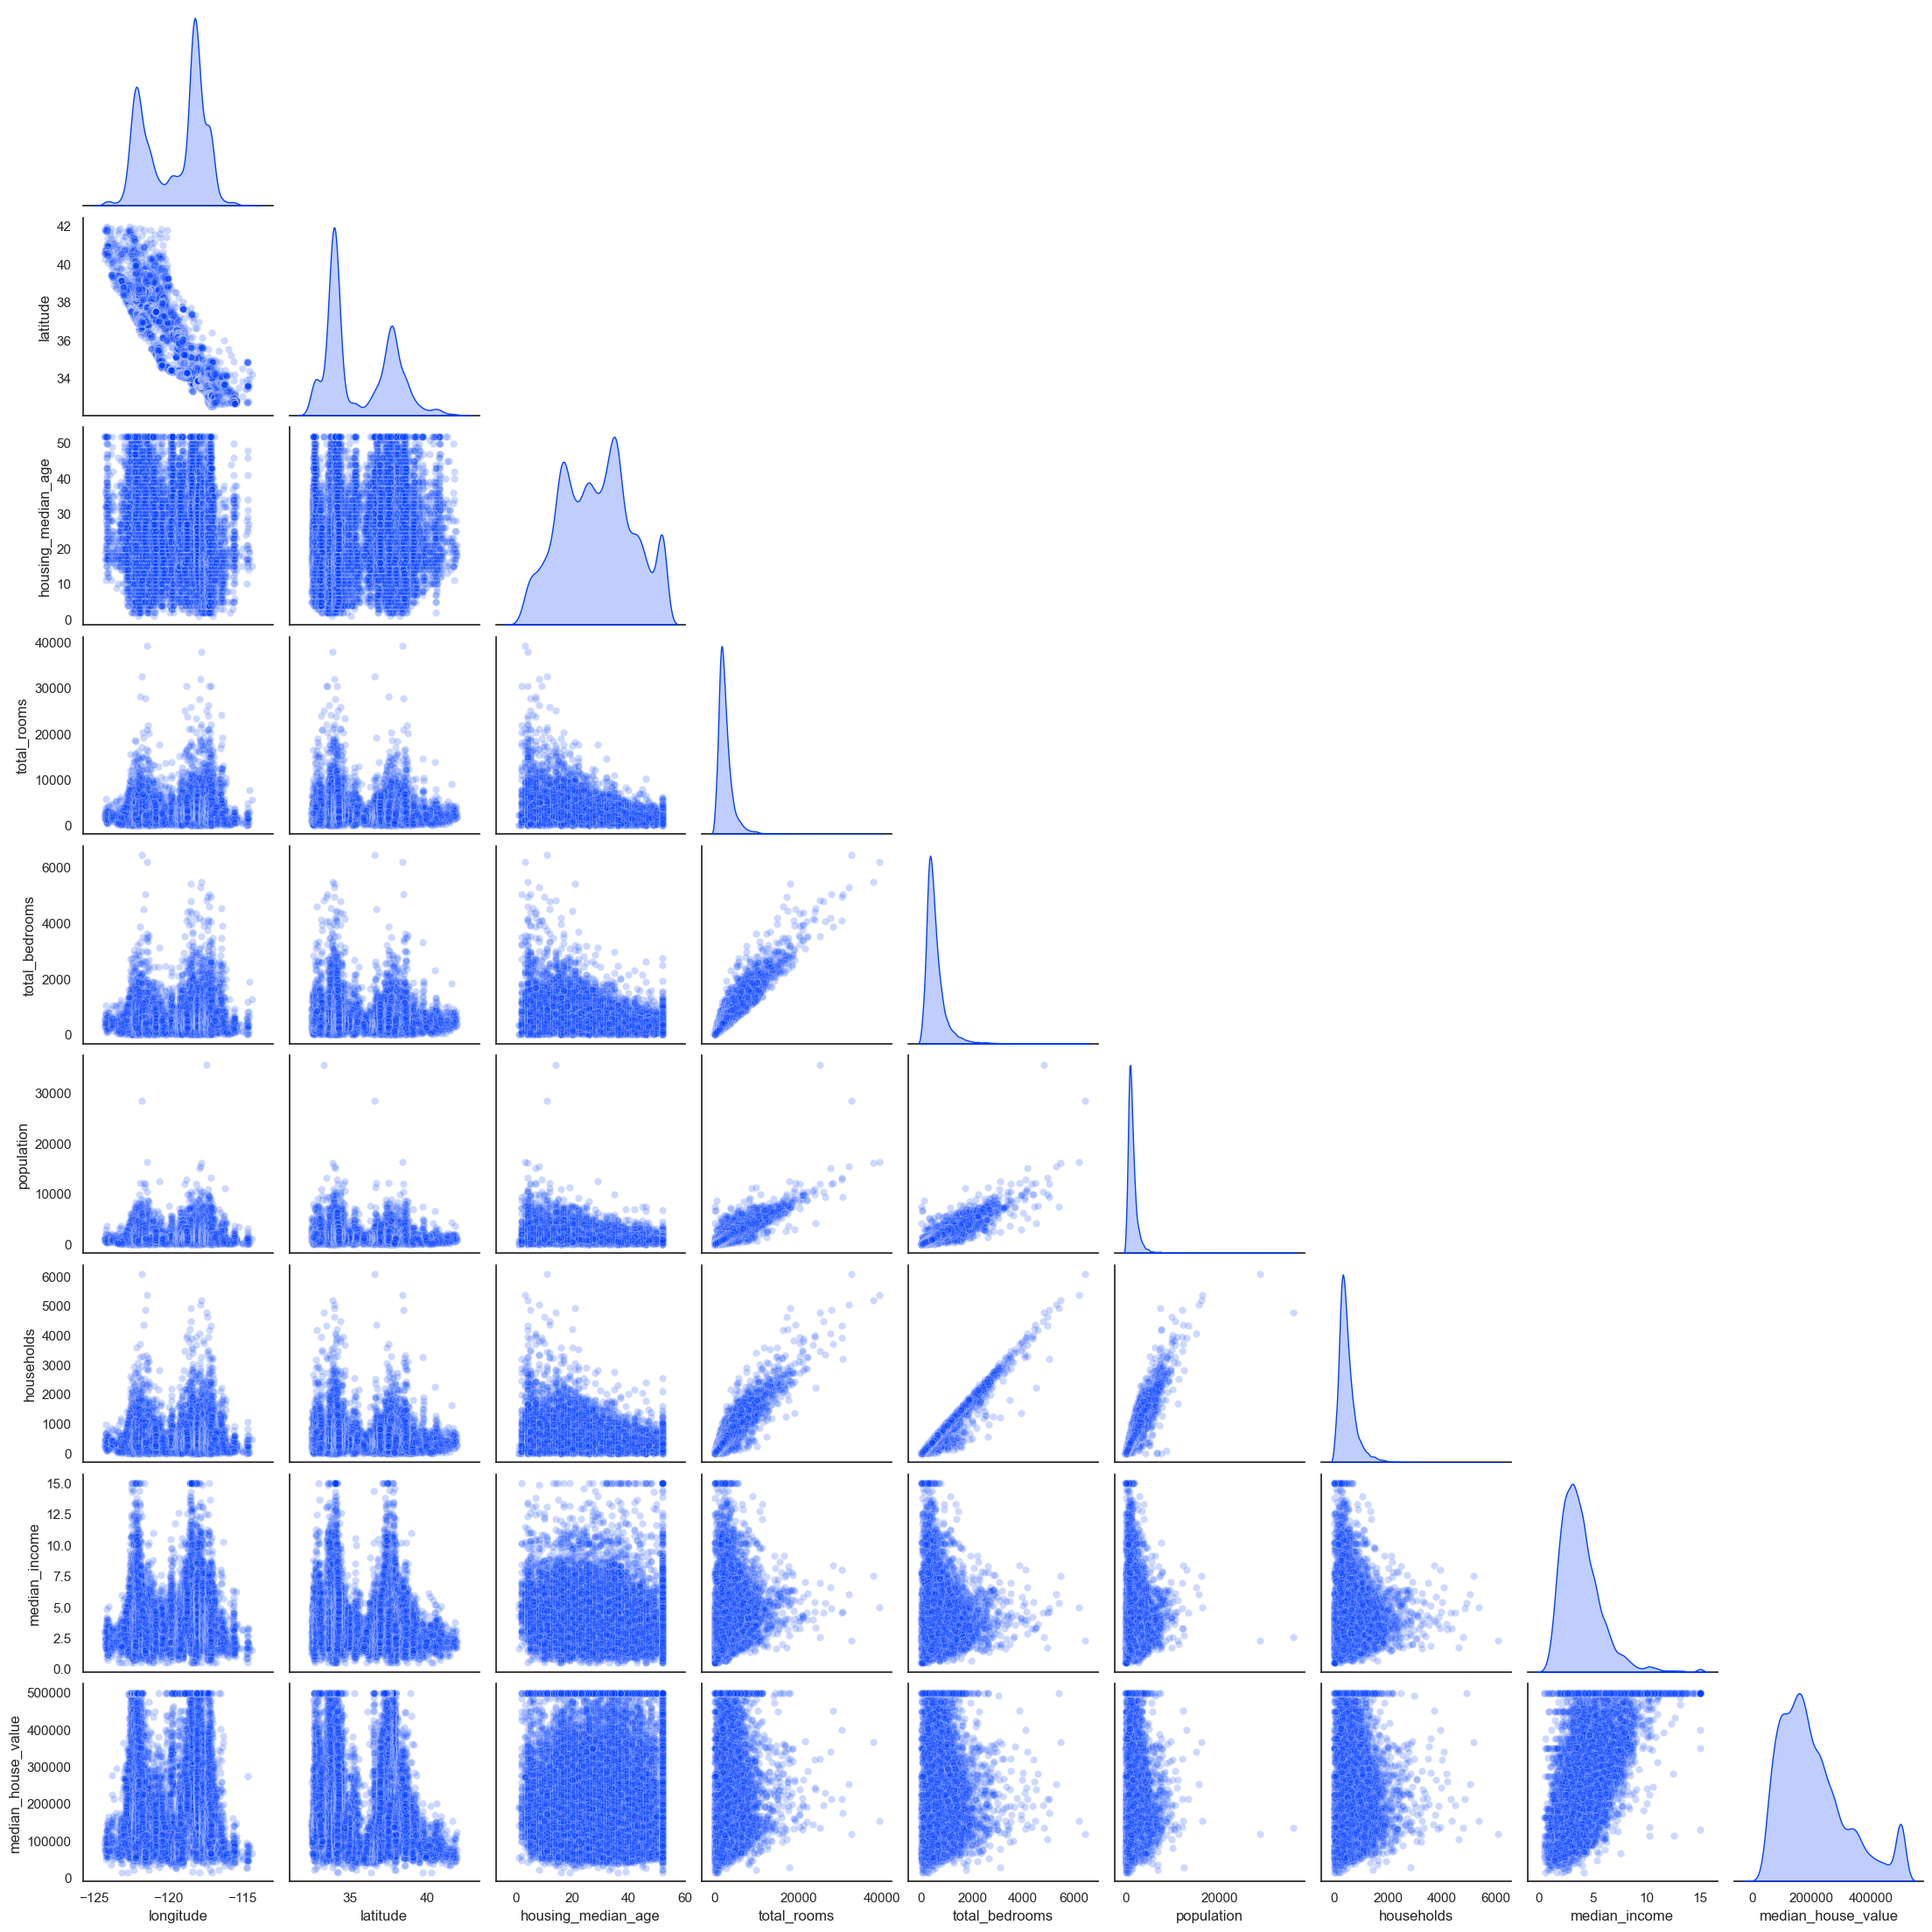

In [7]:
sns.pairplot(df, diag_kind="kde", corner=True, plot_kws=dict(alpha=SCATTER_ALPHA))

In [8]:
df[df['total_bedrooms'].isnull()]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290      -122.16     37.77                47.0       1256.0             NaN   
341      -122.17     37.75                38.0        992.0             NaN   
538      -122.28     37.78                29.0       5154.0             NaN   
563      -122.24     37.75                45.0        891.0             NaN   
696      -122.10     37.69                41.0        746.0             NaN   
...          ...       ...                 ...          ...             ...   
20267    -119.19     34.20                18.0       3620.0             NaN   
20268    -119.18     34.19                19.0       2393.0             NaN   
20372    -118.88     34.17                15.0       4260.0             NaN   
20460    -118.75     34.29                17.0       5512.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   

       population  households  median_income  median_house_value  \
290         570.0       218.0         4.3750            161900.0   
341         732.0       259.0         1.6196             85100.0   
538        3741.0      1273.0         2.5762            173400.0   
563         384.0       146.0         4.9489            247100.0   
696         387.0       161.0         3.9063            178400.0   
...           ...         ...            ...                 ...   
20267      3171.0       779.0         3.3409            220500.0   
20268      1938.0       762.0         1.6953            167400.0   
20372      1701.0       669.0         5.1033            410700.0   
20460      2734.0       814.0         6.6073            258100.0   
20484      1705.0       495.0         5.7376            218600.0   

      ocean_proximity  
290          NEAR BAY  
341          NEAR BAY  
538          NEAR BAY  
563          NEAR BAY  
696          NEAR BAY  
...               ...  
20267      NEAR OCEAN  
20268      NEAR OCEAN  
20372       <1H OCEAN  
20460       <1H OCEAN  
20484       <1H OCEAN  

[207 rows x 10 columns]

In [9]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

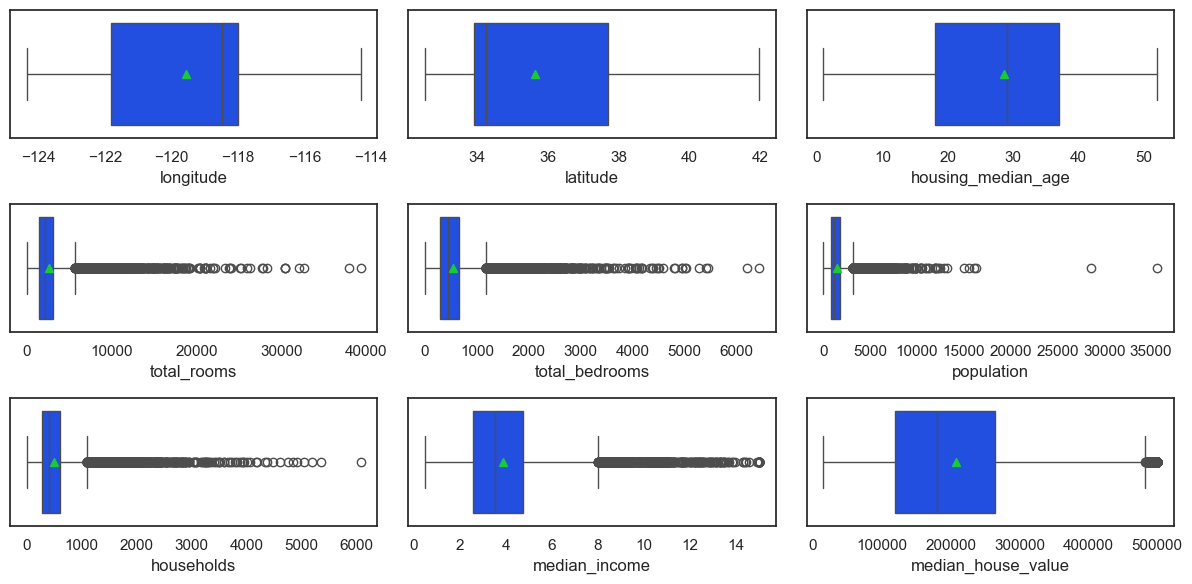

In [10]:
# Create just a figure and only one subplot
fig, axs = plt.subplots(3, 3, figsize=(12,6))
for ax, column in zip(axs.flatten(), df.select_dtypes('number').columns):
    sns.boxplot(
        data=df,
        x=column,
        ax=ax,
        showmeans=True,
    )
    
plt.tight_layout()
    
plt.show()

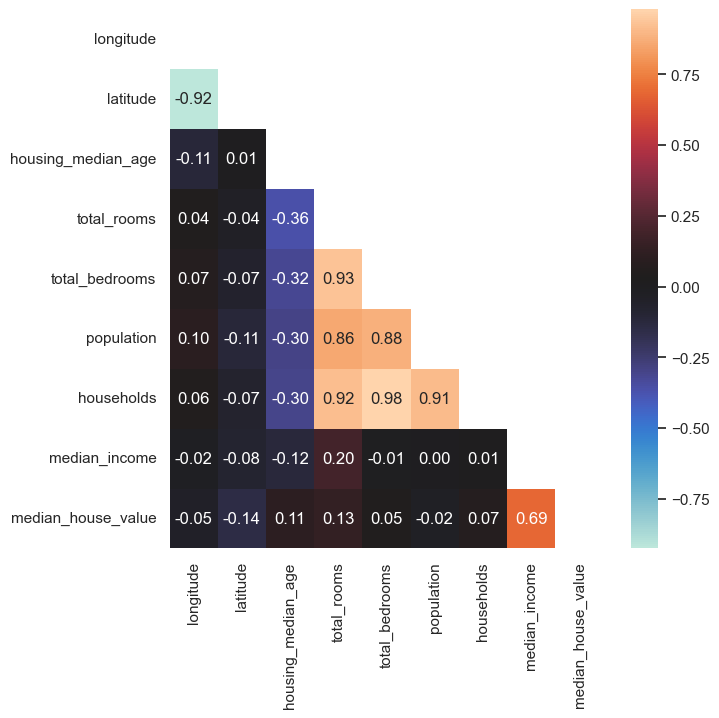

In [11]:
matrix = np.triu(df.select_dtypes(include='number').corr())

fig, axs = plt.subplots(figsize=(7,7))

sns.heatmap(df.select_dtypes(include='number').corr(), mask=matrix, annot=True, fmt=".2f", cmap=PALETTE)

plt.show()

como somente o valor médio da renda possui uma correlação forte com o nosso target (median_house_value), podemos criar novas features que podem aumentar a correlação do target. 3 features possuem uma forte correlação (households, population and total_bedrooms) entre elas, então podemos agrupa-las em features:
- Média de população por domicílio: `population / households`
- Média de cômodos por domicílio: `total_rooms / households`
- Média de quartos por domicílio: `total_bedrooms / households`
- Média de quartos por cômodo: `total_bedrooms / total_rooms`

além disso, podemos criar `classes` para a coluna median_income

### Ajustando Renda Média

In [12]:
df['median_income_cat'] = pd.cut(
    x=df['median_income'],
    bins=[0, 1.5, 3, 4.5, 6, np.inf],
    labels=['0', '1.5', '3', '4.5', '6+']
)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  median_income_cat   20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


<Axes: xlabel='median_income_cat'>

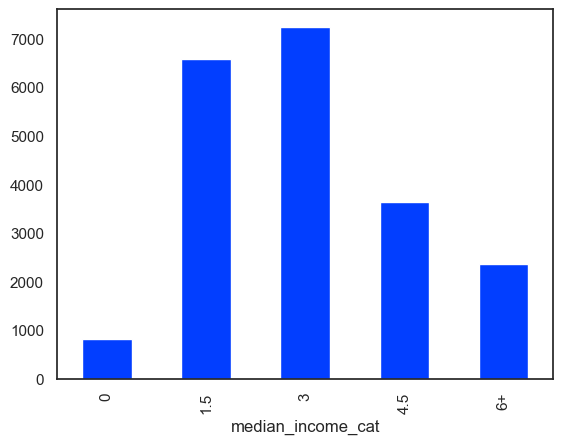

In [13]:
df['median_income_cat'].value_counts().sort_index().plot(kind='bar')

### Criando novas features

In [14]:
# Média de população por domicílio: `population / households`
df['population_per_household'] = df['population'] / df['households']

# Média de cômodos por domicílio: `total_rooms / households`
df['rooms_per_household'] = df['total_rooms'] / df['households']

# Média de quartos por domicílio: `total_bedrooms / households`
df['bedrooms_per_household'] = df['total_bedrooms'] / df['households']

# Média de quartos por cômodo: `total_bedrooms / total_rooms`
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 20640 non-null  float64 
 1   latitude                  20640 non-null  float64 
 2   housing_median_age        20640 non-null  float64 
 3   total_rooms               20640 non-null  float64 
 4   total_bedrooms            20433 non-null  float64 
 5   population                20640 non-null  float64 
 6   households                20640 non-null  float64 
 7   median_income             20640 non-null  float64 
 8   median_house_value        20640 non-null  float64 
 9   ocean_proximity           20640 non-null  object  
 10  median_income_cat         20640 non-null  category
 11  population_per_household  20640 non-null  float64 
 12  rooms_per_household       20640 non-null  float64 
 13  bedrooms_per_household    20433 non-null  floa

### Analisando mudanças

In [15]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  population_per_household  rooms_per_household  \
count        20640.000000              20640.000000         20640.000000   
mean        206855.816909                  3.070655             5.429000   
std         115395.615874                 10.386050             2.474173   
min          14999.000000                  0.692308             0.846154   
25%         119600.000000                  2.429741             4.440716   
50%         179700.000000                  2.818116             5.229129   
75%         264725.000000                  3.282261             6.052381   
max         500001.000000               1243.333333           141.909091   

       bedrooms_per_household  bedrooms_per_room  
count            20433.000000       20433.000000  
mean                 1.097062           0.213039  
std                  0.476104           0.057983  
min                  0.333333           0.100000  
25%                  1.006029           0.175427  
50%                  1.048889           0.203162  
75%                  1.099631           0.239821  
max                 34.066667           1.000000

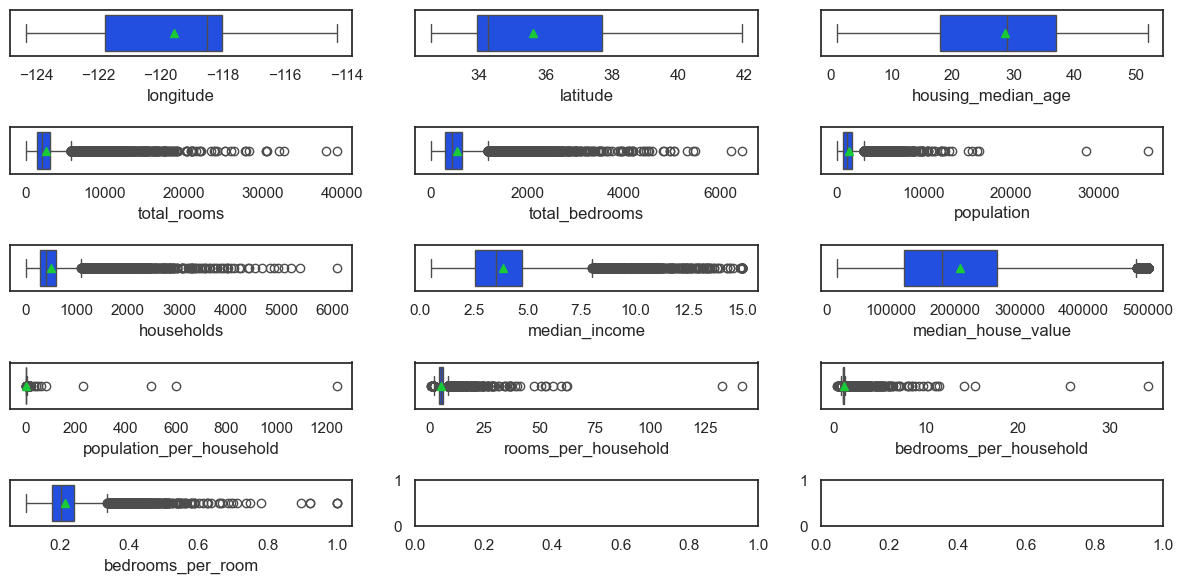

In [16]:
# Create just a figure and only one subplot
fig, axs = plt.subplots(5, 3, figsize=(12,6))
for ax, column in zip(axs.flatten(), df.select_dtypes('number').columns):
    sns.boxplot(
        data=df,
        x=column,
        ax=ax,
        showmeans=True,
    )
    
plt.tight_layout()
    
plt.show()

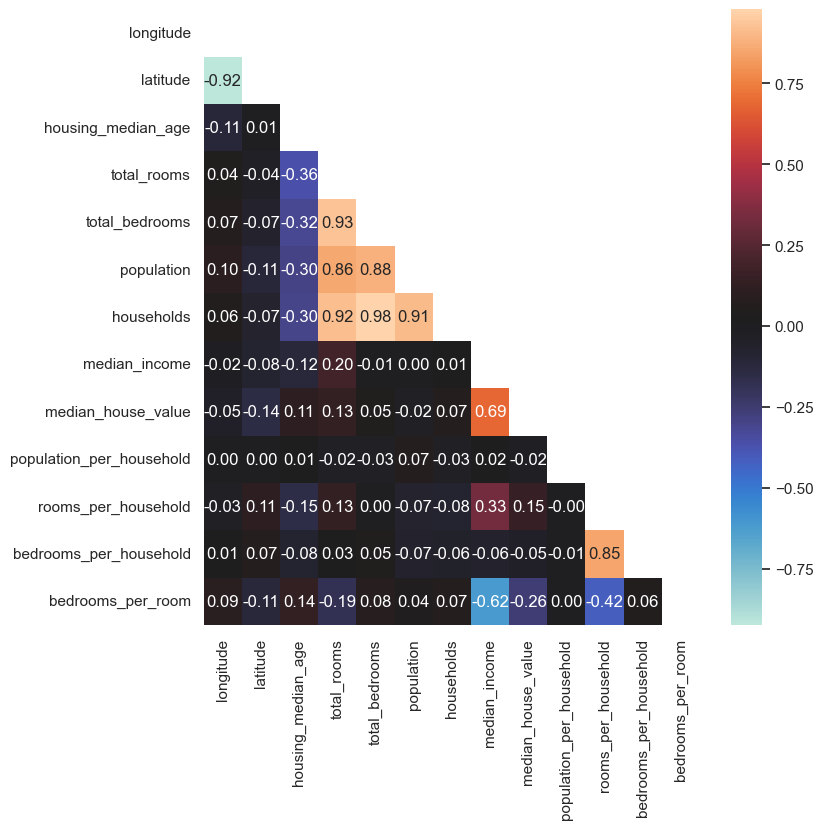

In [17]:
matrix = np.triu(df.select_dtypes(include='number').corr())

fig, axs = plt.subplots(figsize=(8,8))

sns.heatmap(df.select_dtypes(include='number').corr(), mask=matrix, annot=True, fmt=".2f", cmap=PALETTE)

plt.show()

### Tratamento de Outliers

Algumas features aparentam ter o seu valor "cortado", indicando que existe um valor máximo, principalmente para o nosso target `median_house_value`. com isso, vamos retirar os valores com base no quartil onde temos o valor da linha superior

In [18]:
df[df['median_house_value'] == df['median_house_value'].max()].shape[0]

965

In [19]:
df[df['median_house_value'] == df['median_house_value'].min()].shape[0]

4

In [20]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'median_income_cat',
       'population_per_household', 'rooms_per_household',
       'bedrooms_per_household', 'bedrooms_per_room'],
      dtype='object')

In [21]:
QUANTIL = 0.99
df_clean = df.copy()

df_clean = df_clean[
    (df_clean['housing_median_age'] < df_clean['housing_median_age'].quantile(QUANTIL)) &
    (df_clean['total_rooms'] < df_clean['total_rooms'].quantile(QUANTIL)) &
    (df_clean['total_bedrooms'] < df_clean['total_bedrooms'].quantile(QUANTIL)) &
    (df_clean['population'] < df_clean['population'].quantile(QUANTIL)) &
    (df_clean['households'] < df_clean['households'].quantile(QUANTIL)) &
    (df_clean['median_income'] < df_clean['median_income'].quantile(QUANTIL)) &
    (df_clean['median_house_value'] < df_clean['median_house_value'].quantile(QUANTIL)) &
    (df_clean['population_per_household'] < df_clean['population_per_household'].quantile(QUANTIL)) &
    (df_clean['rooms_per_household'] < df_clean['rooms_per_household'].quantile(QUANTIL)) &
    (df_clean['bedrooms_per_household'] < df_clean['bedrooms_per_household'].quantile(QUANTIL)) &
    (df_clean['bedrooms_per_room'] < df_clean['bedrooms_per_room'].quantile(QUANTIL))
]

1 - df_clean.shape[0] / df.shape[0]

0.15009689922480618

In [22]:
df_clean.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  17542.000000  17542.000000        17542.000000  17542.000000   
mean    -119.510681     35.601272           27.284289   2510.416429   
std        1.982379      2.146572           11.325617   1593.742197   
min     -124.300000     32.540000            1.000000      6.000000   
25%     -121.600000     33.920000           18.000000   1465.000000   
50%     -118.460000     34.240000           28.000000   2131.000000   
75%     -117.980000     37.670000           36.000000   3123.750000   
max     -114.550000     41.950000           51.000000  11026.000000   

       total_bedrooms    population    households  median_income  \
count    17542.000000  17542.000000  17542.000000   17542.000000   
mean       515.136757   1387.173355    484.237829       3.698054   
std        320.600714    844.897038    295.581840       1.542026   
min          2.000000      3.000000      2.000000       0.499900   
25%        300.000000    817.000000    287.000000       2.548225   
50%        437.000000   1196.500000    415.000000       3.481450   
75%        642.000000   1739.000000    605.000000       4.625000   
max       2205.000000   5804.000000   1979.000000      10.594100   

       median_house_value  population_per_household  rooms_per_household  \
count        17542.000000              17542.000000         17542.000000   
mean        189691.118345                  2.935131             5.249051   
std          95977.029721                  0.691317             1.126883   
min          14999.000000                  0.750000             1.714286   
25%         114525.000000                  2.470612             4.445462   
50%         171600.000000                  2.853172             5.203224   
75%         243800.000000                  3.306633             5.958378   
max         500000.000000                  5.392954            10.352941   

       bedrooms_per_household  bedrooms_per_room  
count            17542.000000       17542.000000  
mean                 1.063957           0.211549  
std                  0.116268           0.048244  
min                  0.333333           0.113535  
25%                  1.004334           0.176900  
50%                  1.046816           0.203418  
75%                  1.096146           0.238945  
max                  2.127208           0.406295

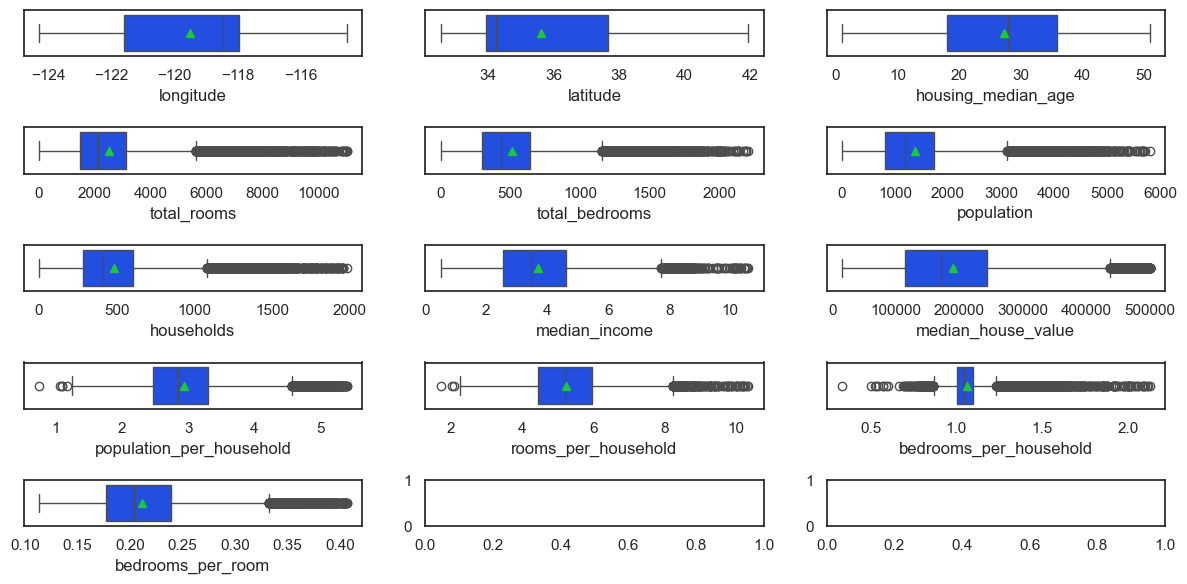

In [23]:
# Create just a figure and only one subplot
fig, axs = plt.subplots(5, 3, figsize=(12,6))
for ax, column in zip(axs.flatten(), df_clean.select_dtypes('number').columns):
    sns.boxplot(
        data=df_clean,
        x=column,
        ax=ax,
        showmeans=True,
    )
    
plt.tight_layout()
    
plt.show()

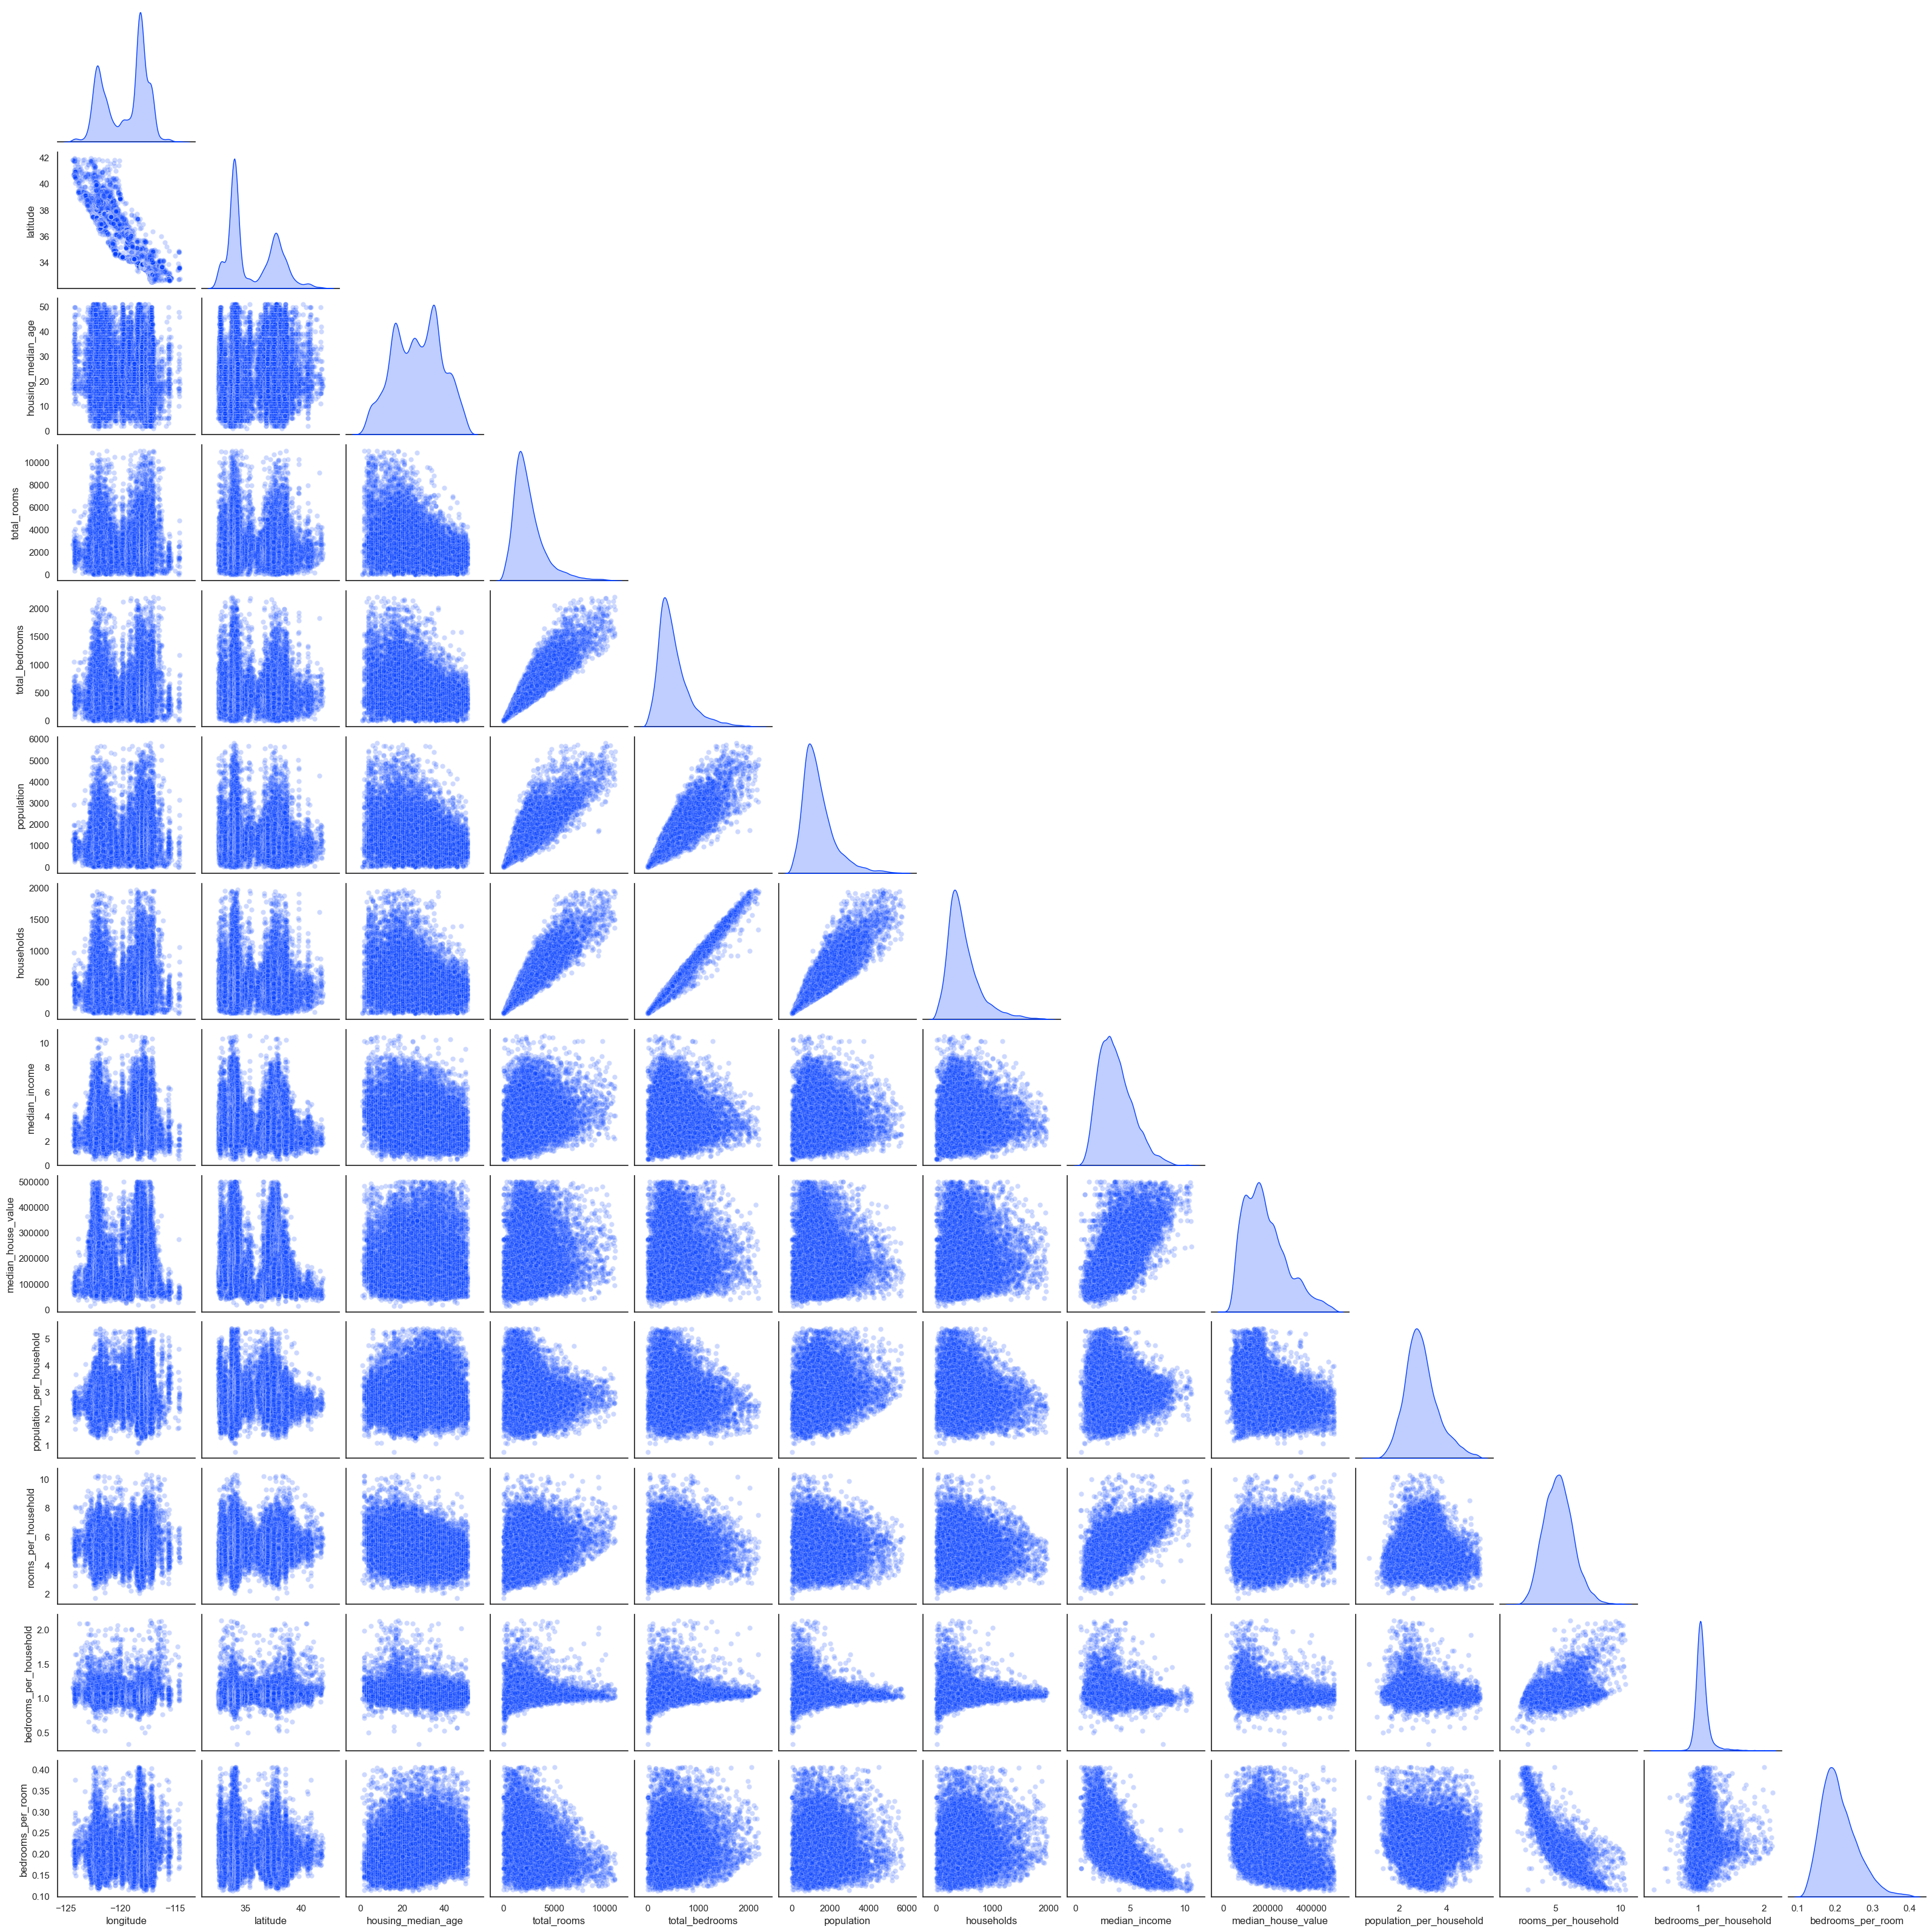

In [24]:
sns.pairplot(df_clean, diag_kind="kde", corner=True, plot_kws=dict(alpha=SCATTER_ALPHA))

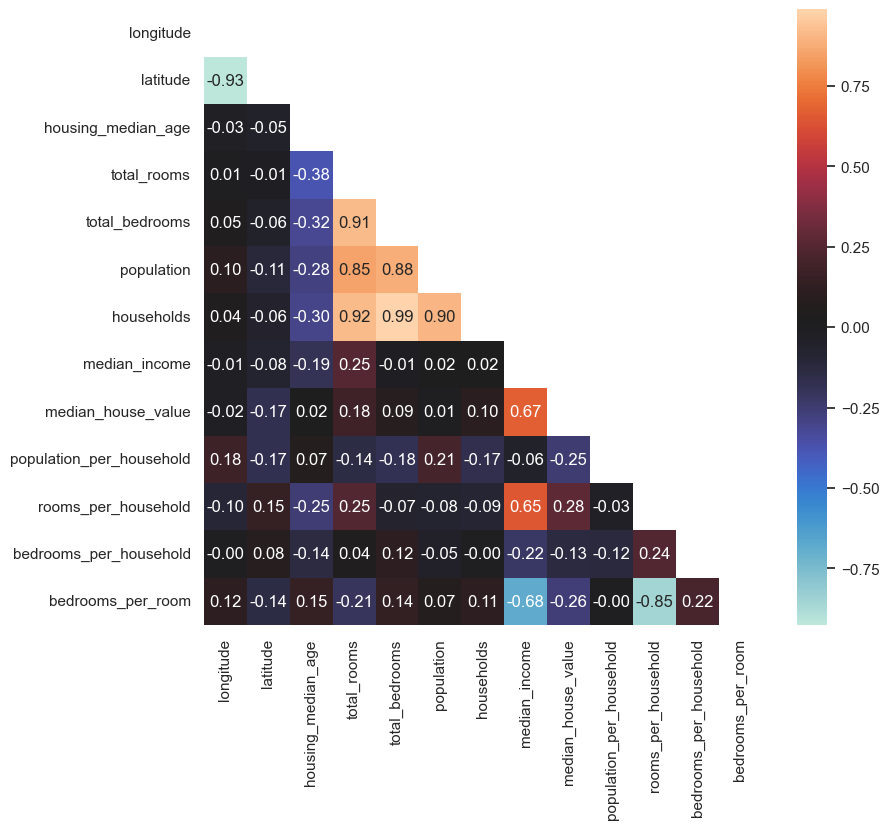

In [25]:
matrix = np.triu(df_clean.select_dtypes(include='number').corr())

fig, axs = plt.subplots(figsize=(9,8))

sns.heatmap(df_clean.select_dtypes(include='number').corr(), mask=matrix, annot=True, fmt=".2f", cmap=PALETTE)

plt.show()

### Tratamento da coluna categórica

In [26]:
df_clean['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     7888
INLAND        5916
NEAR OCEAN    2221
NEAR BAY      1515
ISLAND           2
Name: count, dtype: int64

In [27]:
df_clean = df_clean.loc[df_clean['ocean_proximity'] != 'ISLAND']

df_clean['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     7888
INLAND        5916
NEAR OCEAN    2221
NEAR BAY      1515
Name: count, dtype: int64

### Diminuindo armazenamento do df

In [28]:
columns_int_type = []

for column in df_clean.select_dtypes('number').columns:
    if df_clean[column].apply(lambda x: x.is_integer()).all():
        columns_int_type.append(column)
        
columns_int_type

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_house_value']

In [29]:
columns_float_type = df_clean.select_dtypes('number').columns.difference(columns_int_type)
columns_float_type

Index(['bedrooms_per_household', 'bedrooms_per_room', 'latitude', 'longitude',
       'median_income', 'population_per_household', 'rooms_per_household'],
      dtype='object')

In [30]:
# reduzindo tamanho de integer
df_clean[columns_int_type] = df_clean[columns_int_type].apply(
    pd.to_numeric,
    downcast="integer"
)

# reduzindo tamanho de float
df_clean[columns_float_type] = df_clean[columns_float_type].apply(
    pd.to_numeric,
    downcast="float"
)

# transformando ocean_proximity em cat
df_clean['ocean_proximity'] = df_clean['ocean_proximity'].astype('category')

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17540 entries, 0 to 20639
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 17540 non-null  float32 
 1   latitude                  17540 non-null  float32 
 2   housing_median_age        17540 non-null  int8    
 3   total_rooms               17540 non-null  int16   
 4   total_bedrooms            17540 non-null  int16   
 5   population                17540 non-null  int16   
 6   households                17540 non-null  int16   
 7   median_income             17540 non-null  float32 
 8   median_house_value        17540 non-null  int32   
 9   ocean_proximity           17540 non-null  category
 10  median_income_cat         17540 non-null  category
 11  population_per_household  17540 non-null  float32 
 12  rooms_per_household       17540 non-null  float32 
 13  bedrooms_per_household    17540 non-null  float32 


/var/folders/hh/7zqx20m57csf29d4y06lnk7r0000gn/T/ipykernel_5476/1857315668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[columns_int_type] = df_clean[columns_int_type].apply(
/var/folders/hh/7zqx20m57csf29d4y06lnk7r0000gn/T/ipykernel_5476/1857315668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[columns_float_type] = df_clean[columns_float_type].apply(
/var/folders/hh/7zqx20m57csf29d4y06lnk7r0000gn/T/ipykernel_5476/1857315668.py:14: SettingWithCopyWarning: 
A value is trying to 

In [31]:
df_clean.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  17540.000000  17540.000000        17540.000000  17540.000000   
mean    -119.510803     35.601521           27.284208   2510.566363   
std        1.982456      2.146564           11.326256   1593.762978   
min     -124.300003     32.540001            1.000000      6.000000   
25%     -121.599998     33.919998           18.000000   1465.000000   
50%     -118.459999     34.240002           28.000000   2131.000000   
75%     -117.980003     37.669998           36.000000   3124.000000   
max     -114.550003     41.950001           51.000000  11026.000000   

       total_bedrooms    population    households  median_income  \
count    17540.000000  17540.000000  17540.000000   17540.000000   
mean       515.153592   1387.265051    484.264310       3.698205   
std        320.610927    844.899815    295.587084       1.542048   
min          2.000000      3.000000      2.000000       0.499900   
25%        300.000000    817.000000    287.000000       2.548475   
50%        437.000000   1197.000000    415.000000       3.481900   
75%        642.250000   1739.250000    605.000000       4.625000   
max       2205.000000   5804.000000   1979.000000      10.594100   

       median_house_value  population_per_household  rooms_per_household  \
count        17540.000000              17540.000000         17540.000000   
mean        189670.701140                  2.935199             5.249125   
std          95959.529764                  0.691326             1.126916   
min          14999.000000                  0.750000             1.714286   
25%         114500.000000                  2.470773             4.445517   
50%         171550.000000                  2.853426             5.203444   
75%         243800.000000                  3.306733             5.958417   
max         500000.000000                  5.392954            10.352942   

       bedrooms_per_household  bedrooms_per_room  
count            17540.000000       17540.000000  
mean                 1.063918           0.211538  
std                  0.116204           0.048236  
min                  0.333333           0.113535  
25%                  1.004324           0.176899  
50%                  1.046808           0.203414  
75%                  1.096116           0.238924  
max                  2.127208           0.406295

### Exportando dataset

In [32]:
df_clean.to_parquet(CLEAN_DATA, index=False)